In [1]:
import torch

In [2]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
device


device(type='cuda')

In [4]:
import yaml
from types import SimpleNamespace

# load config
# config_path = "/export/home/workspace/dreambooth/diffusers/configs/zerobooth.yaml"
config_path = "/export/home/workspace/dreambooth/diffusers/configs/zerobooth_openimage.yaml"
config = yaml.load(open(config_path, "r"), Loader=yaml.FullLoader)
config = SimpleNamespace(**config)


In [5]:
print(config)

namespace(adam_beta1=0.9, adam_beta2=0.999, adam_epsilon='1e-08', adam_weight_decay='1e-02', gradient_accumulation_steps=2, image_size=224, learning_rate='2e-6', local_rank=-1, logging_dir='logs', logging_steps=200, lr_scheduler='constant', lr_warmup_steps=0, max_grad_norm=20.0, max_train_steps=70000, mixed_precision='no', model={'train_text_encoder': True, 'train_unet': True, 'pretrained_model_name_or_path': 'runwayml/stable-diffusion-v1-5', 'revision': None, 'text_model': 'bert-base-uncased', 'pretrained': '/export/share/junnan-li/BLIP2/checkpoint/clip_q16.pth', 'vision_model': 'clip', 'image_size': 224, 'num_query_token': 16, 'max_text_length': 32, 'embed_dim': 256, 'num_proj_query_token': 32, 'use_grad_checkpointing': True}, output_dir='output/pretrain-20230211-unet-textenc-v1.5', save_steps=5000, scale_lr=False, seed=1337, tgt_image_size=512, train_batch_size=1)


In [6]:
from modeling_zerobooth_controlnet import ZeroBooth

model = ZeroBooth(config=config.model)


Creating model
_IncompatibleKeys(missing_keys=[], unexpected_keys=['visual.proj', 'visual.ln_post.weight', 'visual.ln_post.bias', 'visual.transformer.resblocks.23.attn.in_proj_weight', 'visual.transformer.resblocks.23.attn.in_proj_bias', 'visual.transformer.resblocks.23.attn.out_proj.weight', 'visual.transformer.resblocks.23.attn.out_proj.bias', 'visual.transformer.resblocks.23.ln_1.weight', 'visual.transformer.resblocks.23.ln_1.bias', 'visual.transformer.resblocks.23.mlp.c_fc.weight', 'visual.transformer.resblocks.23.mlp.c_fc.bias', 'visual.transformer.resblocks.23.mlp.c_proj.weight', 'visual.transformer.resblocks.23.mlp.c_proj.bias', 'visual.transformer.resblocks.23.ln_2.weight', 'visual.transformer.resblocks.23.ln_2.bias'])
freeze class_embedding
freeze positional_embedding
freeze conv1.weight
freeze ln_pre.weight
freeze ln_pre.bias
freeze transformer.resblocks.0.attn.in_proj_weight
freeze transformer.resblocks.0.attn.in_proj_bias
freeze transformer.resblocks.0.attn.out_proj.weight


/opt/conda/lib/python3.8/site-packages/transformers/modeling_utils.py:402: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  with safe_open(checkpoint_file, framework="pt") as f:
/opt/conda/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/opt/conda/lib/python3.8/site-packages/torch/storage.py:899: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This sh

load checkpoint from /export/share/junnan-li/BLIP2/checkpoint/clip_q16.pth
_IncompatibleKeys(missing_keys=['visual_encoder.class_embedding', 'visual_encoder.positional_embedding', 'visual_encoder.conv1.weight', 'visual_encoder.ln_pre.weight', 'visual_encoder.ln_pre.bias', 'visual_encoder.transformer.resblocks.0.attn.in_proj_weight', 'visual_encoder.transformer.resblocks.0.attn.in_proj_bias', 'visual_encoder.transformer.resblocks.0.attn.out_proj.weight', 'visual_encoder.transformer.resblocks.0.attn.out_proj.bias', 'visual_encoder.transformer.resblocks.0.ln_1.weight', 'visual_encoder.transformer.resblocks.0.ln_1.bias', 'visual_encoder.transformer.resblocks.0.mlp.c_fc.weight', 'visual_encoder.transformer.resblocks.0.mlp.c_fc.bias', 'visual_encoder.transformer.resblocks.0.mlp.c_proj.weight', 'visual_encoder.transformer.resblocks.0.mlp.c_proj.bias', 'visual_encoder.transformer.resblocks.0.ln_2.weight', 'visual_encoder.transformer.resblocks.0.ln_2.bias', 'visual_encoder.transformer.resblocks

/opt/conda/lib/python3.8/site-packages/diffusers/configuration_utils.py:195: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


In [7]:
# BEST ONES
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-20230228-unet-textenc-v1.5-capfilt6b7-fullmask-synbbox-rr0-500k/500000"
# load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-202302315-unet-textenc-v1.5-capfilt6b7-synbbox-matting-rr0-drop15-500k/420000"
load_from = "/export/home/workspace/dreambooth/diffusers/output/pretrain-202302315-unet-textenc-v1.5-capfilt6b7-synbbox-matting-rr0-drop15-500k/500000"

model.load_checkpoint(load_from)
model.to(device)
model.eval()

ZeroBooth(
  (blip): BLIP(
    (visual_encoder): VisionTransformer(
      (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
            )
            (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
            )
            (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (drop_path): Identity()
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
 

In [8]:
from PIL import Image
import requests

# load image
def load_image(path):
    try:
        img = Image.open(path).convert("RGB")
    except:
        img = Image.open(requests.get(path, stream=True).raw).convert("RGB")
    return img


In [9]:
def display_img(img):
    w, h = img.size
    f = 368 / max(w, h)

    display(img.resize((int(w * f), int(h * f))))


a cat 


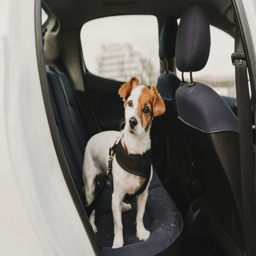

In [33]:
# negative_prompt = "out of frame, lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature"
# negative_prompt = "car, blue, over-exposed, saturated, blur, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

# negative_prompt = "people, human, saturated, duplicate, out of frame, over-exposure, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

# subject = "person"
# subject = "bottle"
# subject = "car, vehicle, sports car"
# subject = "rabbit"
# subject = "flower"
# subject = "tower"
# subject = "jetski"
# subject = "sofa"
# subject = "cap"
# subject = "bowl"
subject = "dog"
# subject = "vehicle"
# subject = "bowl"
# subject = "bronze sculpture"
# subject = "bottle"
# subject = "bottle"
# subject = "vase"
# subject = "glasses"
# subject = "sunglasses"
# subject = "toy character"
# subject = "zebra"
# subject = "backpack"
# subject = "cat"
# subject = "teapot"
# subject = "vase"
# subject = "car"
# subject = "bottle"
# subject = "sculpture"
# subject = "cat"

# caption = "a dog and a cat"
# caption = "a vase"
# caption = "a face"
# caption = "a car"
# caption = "a rabbit"
# caption = "a bowl"
# caption = "a bottle"
# caption = "a face"
# caption = "a bird"
# caption = "a tower"
# caption = "a car"
# caption = "a bottle"
# caption = "a sunglasses"
# caption = "a man wearing a blue hat"
# caption = "a backpack"
# caption = "a bottle"
# caption = "a bottle"
# caption = "a vase"
# caption = "a tiger tiger tiger tiger tiger"
# caption = "a bird"
# caption = "a teapot"
# caption = "a appetizer"
# caption = "a sofa"
# caption = "a cap"
# caption = "a avan gogh painting"
# caption = "a sleeping dog"
# caption = "A painting of a squirrel eating a burger"
# caption = "a truck"
# caption = "a sculpture sculpture sculpture sculpture sculpture"
caption = "a cat"
# caption = "a dog"

# =========== background ============
# subprompt = "at the grand canyon"
# subprompt = "in the snowy forest"
# subprompt = ""
# subprompt = "painted red"
# subprompt = "placed on a wooden table"
# subprompt = "placed on a blue fabric"
# subprompt = "in front of irish pub fireplace"
# subprompt = "in the ocean"
# subprompt = "on a green fabric"
# subprompt = "painted black"
# subprompt = "buried in sands"
# subprompt = "two of them, side of side"
# subprompt = "in a snowy forest"
# subprompt = "buried in the sands"
# subprompt = "in the versailles hall of mirrors, vivid color"
# subprompt = "in the distance sits under a tree and looks at the golden wheat field, Studio Ghibli "
# subprompt = "at the woods in the cape Eryn Vorn, Middle Earth, Oil Painting, by Charlie Bowater, Bokeh, HD"
# subprompt = "in front of irish pub fireplace during a rainy night"
# subprompt = "running on the road"
# subprompt = "buried in the snow! lying down on the ground!"
# subprompt = "in syndey, view from a distance"
# subprompt = "in paris, view from a distance"
# subprompt = "placed on a blue fabric"
# subprompt = "near the river"
# subprompt = "in the ocean"
# subprompt = "in the outer space"
# subprompt = "placed on a river bank, near the river"
# subprompt = "outside the Louvre Museum"
# subprompt = "at the grand canyon, snowy ground, sunset, very peaceful"
# subprompt = "outside the Louvre Museum, snowy ground, sunset, very peaceful"
# subprompt = "with a colorful flower bouquet placed in it, in front of a window"
# subprompt = "as a style on a stained glass window"
# subprompt = "painted green, at the great wall"
# subprompt = "in front of the acropolis"
# subprompt = "full body photo"
# subprompt = "on a dog face"
# subprompt = "under the water"
# subprompt = "in a wide snowy field, river in the background, very peaceful"
# subprompt = "in front of the acropolis"
# subprompt = "buried in sands, the bottle is"
# subprompt = "in a wooden dog house"
# subprompt = "silver sculpture"
# subprompt = "wearing transparent sunglasses"
# subprompt = "at mountain fuji"
# subprompt = "at mountain fuji, cherry blossoms on the clouds, brilliant peaks, sunny, early morning, by by yoneyama mai, trending on artstation"
# subprompt = "at mountain fuji, cherry blossoms on the clouds, brilliant peaks, sunny, early morning, photorealistic"
# subprompt = "at mountain fuji, brilliant peaks, sunny"
# subprompt = "at the grand canyon, surrounded by desert mountains at sunset on mars, planet mars, moab, utah, a tilt shift photo by frederic church, trending on unsplash, hudson river school, 3 5 mm photo, photo taken with provia, national geographic photo"
# subprompt = "on a wooden table"
# subprompt = "with the night sky"
# subprompt = "as dog"
# subprompt = "side by side"
# subprompt = "wearing a stylish sunglasses"
# subprompt = ""

# =========== medium ============
# subprompt = "marble sculpture"
# subprompt = "bronze sculpture"
# subprompt = "silver sculpture"
# subprompt = "fabric toy"
# subprompt = "made of lego"
# subprompt = "made of marble"
# subprompt = "made of bronze"
# subprompt = "3d low poly, low-resolution"
# subprompt = "in the style of minecraft"


# =========== style ===========
# subprompt = "midigliani painting"
# subprompt = "in the style of claymation"
# subprompt = "in the style of Alexander Calder sculptures"
# subprompt = "flying over the acropolis"
# subprompt = "painting by van gogh"
# subprompt = "by van gogh"
# subprompt = "swimming in the river"
# subprompt = "placed in a kitchen, with flowers in it"
# subprompt = "placed in a kitchen"
# subprompt = "placed on a wooden table, in a kitchen"
# subprompt = "on a sunny meadow"
# subprompt = "by Studio Ghibli"
# subprompt = "with surreal background, plants and flowers, mexican art, naive art, by frida kahlo" # [BAD]
# subprompt = "watercolor painting"
# subprompt = "painted red, in the style of ink painting"
# subprompt = "photorealistic"
# subprompt = "painted pink"
# subprompt = "3d rendering"
# subprompt = "on a watercolor painting"
# subprompt = "in the river"

# =========== appearance ==========
# subprompt = "wearing a white space suit"
# subprompt = "wearing a chinese armour"
# subprompt = "head-shot wearing sunglasses"
# subprompt = "wearing space helmet"
# subprompt = "on a skateboard"
# subprompt = "wearing a lakers cap"
# subprompt = "wearing a red hat"
# subprompt = "wearing sunglasses"
# subprompt = "eating ramen soup"
# subprompt = "in a blue bucket"
# subprompt = "with the night sky"
# subprompt = "in stormtropper suit"
# subprompt = "wearing cool stylish glasses"
# subprompt = "painted pink"
# subprompt = "painted black"
# subprompt = "with ramen in it"
# subprompt = "in the style of edvard munch's the scream"
# subprompt = "buried in the sands"
# subprompt = "wearing a christmas hat"
# subprompt = "wearing a christmas hat"
# subprompt = "standing on two feet"
# subprompt = "is eating ramen"
# subprompt = "flying over acropolis"

# subprompt = "with a dog in it"

# subprompt = ""
# =========== gestures / poses ===========
# subprompt = "sleeping, lying down"
# subprompt = "jumping"
# subprompt = "getting a haircut"
# subprompt = "happily jumping"
# subprompt = "swimming underwater"


# =========== misc =============
# subprompt = "wearing a white hat"
# subprompt = "painted as decoration on a cup"
# subprompt = "wearing nice cool sunglasses, at the grand canyon"
# subprompt = "seen from the back"
# subprompt = "with ramen in it"
# subprompt = "on a wooden table in the kitchen"
# subprompt = "displayed in the forbidden city"
# subprompt = "shaking hands with donald trump"
# subprompt = "with flower bouquet at the window"
# subprompt = "as a lamp"

# =========== advanced ==========
# subprompt = "in the style of Tesla power armor realistic cyborg anthropomorphic scifi kirlian photography electric field glowing, cyberpunk, portrait art by donato giancola and greg rutkowski, realistic face, glowing in tesla electricity visible magnetic field, digital art, trending on artstation, symmetry"

subprompt = ""

prompt = caption + " " + ",".join([subprompt] *1)

print(prompt)

# ============ dogs & cats =============
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-in-bucket.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/hat-dog.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-little.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/big-gold.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/little-gold.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-corgi-3.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-corgi.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/corgi-puppy.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-retriever-in-red-car.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/alvan-nee/alvan-nee-eoqnr8ikwFE-unsplash.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/alvan-nee/alvan-nee-padded.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-dog.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-dog-2.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-grass.jpg"
image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-harness-1598455194.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Bernese-mountain-dog-grass.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-doorstep.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-retriever-2.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/blue-cat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cat-dog.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-at-garden.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/e4t-cat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/unique-cat/unique-cat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/loulou-cat/loulou-1.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/loulou-inference.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/unsplash-image-NeRrOJJs1J8.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/alvan-nee-1shot/alvan-nee-brFsZ7qszSY-unsplash.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-dog-alvan-nee-6shot/1.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/unsplash-hat/unsplash-zVycYmcblDY.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle/df-bottle.jpg"

# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-cat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-cat2.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat-in-the-wild.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat-wild.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-cat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sphnix-cat.jpg"

# ========== vehicle =========
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cybertruck.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/miller-motor.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-car.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bigbull.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-car-large.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/toyota.jpg"

# ========== misc =======
# image_path = "/export/home/workspace/dreambooth/diffusers/data/vase.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-ti.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-pink.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bowl-qinghua.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/qinghua-bowl-small.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bird-vase.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/brown-hat.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/rotten-tomato2.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bizza-tower.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/red-tower.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle.jpg"

# ========== bird =============
# image_path = "/export/home/workspace/dreambooth/diffusers/data/blue-jay.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/red-parrot.jpg"


# ========== rabbit ==========
# image_path = "/export/home/workspace/dreambooth/diffusers/data/rabbit.jpg"

# ========== backpack ========
# image_path = "/export/home/workspace/dreambooth/diffusers/data/black-backpack.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bag.jpg"


# ========== teapot ======
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-teapot.jpg"


# image_path = "/export/home/workspace/dreambooth/diffusers/data/running-retriever.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/00sl-pets-superJumbo.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cloth.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/toy.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/kettle.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/1676559131147.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/shutterstock_517026226.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sunglasses.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/bronze-sculpture.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/head-sculpture.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/glasses-wide.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sf-cartoon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/LV-backpack.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/shutterstock_517026226.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/gold-retriever-in-red-car.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/white-bg.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-karolina-grabowska-8947549.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/sphinix-ladder.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Pembroke-Welsh-Corgi-standing-outdoors-in-the-fall.jpeg"

# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-jay-pizzle-15489383.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-dids-1302292.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-anna-shvets-4587973.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/istockphoto-1311993425-170667a.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/zebra.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/dog-car.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-lukas-582981.jpg"
# image_path = "https://upload.wikimedia.org/wikipedia/commons/4/41/Left_side_of_Flying_Pigeon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Left_side_of_Flying_Pigeon.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/WX20230218-010943@2x.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/avocado-sofa.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/50mile.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/muffin.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/jetski.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/yellow-hat.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/pexels-dominika-roseclay-1239422.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/WechatIMG10.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/mobama.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-backpack/df-bag.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/benchmark/one-shot/soff-garavano-building/Snipaste_2023-02-27_15-03-58.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/benchmark/one-shot/laura-chouette-clock/laura-chouette-pxpw52_Cvsg-unsplash.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/benchmark/one-shot/igorkon-wood-sculpture/photo-1520626956985-4899e6db52de.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/benchmark/one-shot/eval-lee-sculpture/photo-1554533899-787ef890e98f.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/avocado-sofa.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/chair.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle-synthetic/df-bottle.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle/df-bottle.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/df-bottle/df-bottle_syn.jpg"
image = load_image(image_path)

display(image.resize((256, 256)))


In [11]:
config.image_size


224

In [12]:
from train_zerobooth import create_transforms

# create transforms
transforms = create_transforms(config)

inp_tsfm = transforms["inp_image_transform"]
txt_tsfm = transforms["text_transform"]


In [13]:
ctx_begin_pos = [
    len(
        model.tokenizer(
#             base_prompt,
            prompt,
            padding="do_not_pad",
        ).input_ids
    )
    - 1
]


In [14]:
samples = {
    "input_images": inp_tsfm(image).unsqueeze(0).to(device),
    "class_names": [txt_tsfm(subject)],
    "prompt": [txt_tsfm(prompt)],
    "ctx_begin_pos": [2],
#     "ctx_begin_pos": ctx_begin_pos
}


In [15]:
import random
import torch.backends.cudnn as cudnn
import numpy as np

### Attention Map Visualization

In [16]:
from diffusers.utils import load_image

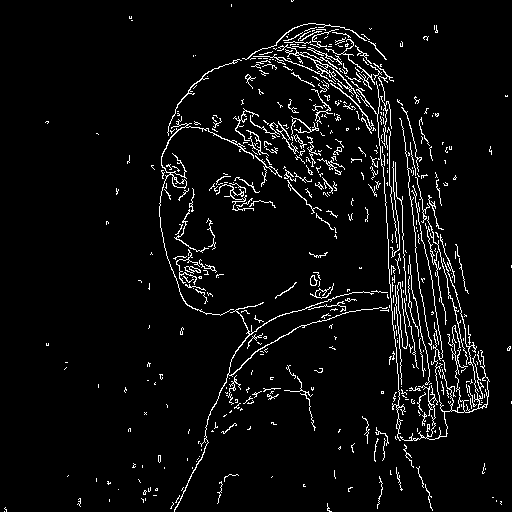

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:05<00:00,  9.11it/s]


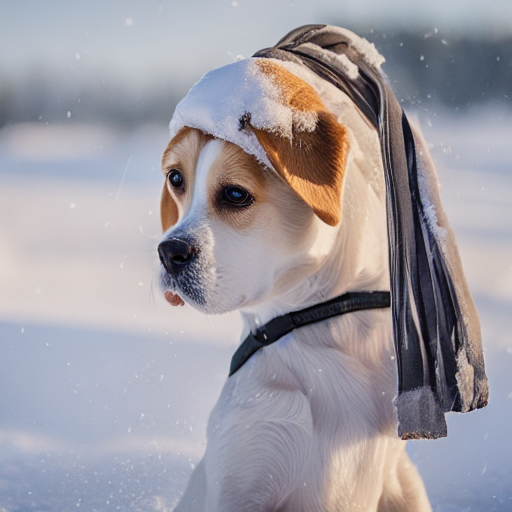

In [34]:
# cond_image = load_image('https://huggingface.co/takuma104/controlnet_dev/resolve/main/pose_right.png')
# cond_image = load_image('https://huggingface.co/takuma104/controlnet_dev/resolve/main/pose.png')
cond_image = load_image("https://huggingface.co/takuma104/controlnet_dev/resolve/main/vermeer_canny_edged.png")

display(cond_image)

# prompt = "a cat at the times square"
prompt = ",".join(["a dog in the snowy forest"] * 20)
# prompt = "a dog wearing a blue hat, award winning"
samples = {
    "input_images": inp_tsfm(image).unsqueeze(0).to(device),
    "class_names": [txt_tsfm(subject)],
    "prompt": [txt_tsfm(prompt)],
    "ctx_begin_pos": [2],
    "cond_image": cond_image
#     "ctx_begin_pos": ctx_begin_pos
}


seed = 888
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

cudnn.benchmark = False
cudnn.deterministic = True

num_diffusion_steps = 50
disable_subject = False

for i in range(1):    
    output = model.generate(
        samples,
        seed=10193221412,
        guidance_scale=7.5,
        num_inference_steps=num_diffusion_steps,
        neg_prompt=negative_prompt,
        height=512,
        width=512,
    )

    display(output[0])

In [ ]:
type(model.controlnet)

In [ ]:
import inspect, diffusers
# print(inspect.signature(diffusers.models.controlnet.ControlNetModel.forward))
print(inspect.signature(model.unet))